## 卷积神经网络（CNN）入门

1. 为什么学习卷积神经网络？

计算机视觉（Computer Vision）是近年来深度学习推动下发展最快的领域之一。
它的应用随处可见：

* **自动驾驶**：识别周围的车辆和行人，从而避免碰撞。
* **人脸识别**：如今解锁手机甚至开门，都可以仅靠“刷脸”完成。
* **推荐与筛选**：手机上的美食、酒店、风景照片展示，背后都有深度学习帮你筛选“最吸引人”的图片。
* **艺术创作**：神经网络还能创造新的艺术风格图像。

学习计算机视觉的两个主要理由：

1. **开启全新应用**：许多几年前还不可能的应用，如今已成为现实。掌握这些工具，你也能创造新的产品。
2. **启发跨领域创新**：即使不直接从事计算机视觉，CV 领域的创新网络结构和算法也能给语音识别、自然语言处理等其他方向带来灵感。

---

2. 计算机视觉中的典型任务

2.1 **图像分类（Image Classification）**
   输入一张图片（如 64×64），判断它是猫还是狗。

2.2 **目标检测（Object Detection）**
   不仅识别图像中有什么对象，还要定位它们。例如自动驾驶中，不只是知道有“车”，还要知道“车在哪里”，并用边框框出多个目标。

2.3 **风格迁移（Neural Style Transfer）**
   把一幅图像的“内容”与另一幅图像的“风格”结合。例如用毕加索的画风重新绘制一张照片。

这些任务展示了 CNN 不仅能识别，还能创造和重构。

---

3. 为什么要用卷积？

3.1 图像数据规模问题

* 小图像（64×64，RGB 三通道）：输入特征数 = 64×64×3 = 12,288。
* 大图像（1000×1000，RGB）：输入特征数 = 1000×1000×3 = 3,000,000。

如果直接用全连接网络：

* 假设第一层有 1000 个隐藏单元
* 权重矩阵大小 = 1000 × 3,000,000 = 30 亿参数！

问题：

* 数据量不足，极易过拟合
* 计算和存储需求极高，不可行

3.2 卷积操作的优势

卷积运算（Convolution）是 CNN 的核心构件。它通过 **局部连接** 和 **参数共享** 大幅减少参数数量，使得大图像也能高效处理。

---

4. 小结

* 卷积神经网络解决了传统全连接网络在图像任务上的参数爆炸问题。
* 它能支撑图像分类、目标检测、风格迁移等多种任务。
* 学习 CNN 不仅能帮助你进入计算机视觉领域，还能启发其他 AI 研究方向。


## 卷积操作

CNN最重要的是构建块是卷积层：直接连接图片输入的卷积层不会连接到图像中的每个像素，而只是只与某个框定范围内的像素相连接；同样，第二卷积层的每个神经元也仅连接第一层中某个框定范围内的神经元；这种允许神经网络关注第一个隐藏层的低阶特征，然后在下一个隐藏层中将它们组装成高阶特征，以此类推。

CNN在图像识别方便效果好的原因之一是现实中的图像也有层次结构。

![矩形范围内连接的CNN层](./images/CNN/p1.png)

注意：之前研究的所有多层神经网络都具有由一长串神经元组成的层，必须将输入图像展平为一维，然后再将其输入神经网络。在CNN中，每一层都以二维形式表示，这使得将神经元与其相应的输入进行匹配变得更加容易。

![图片的层次结构1](./images/CNN/p2.png)

### 边缘检测

![卷积操作例子](./images/CNN/p3.png)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d, correlate2d  # correlate2d 互相关
import tensorflow as tf

K_vertical = np.array([[ 1,  0, -1],
                       [ 1,  0, -1],
                       [ 1,  0, -1]], dtype=np.float32)

some_data = np.array([[3,0,1,2,7,4],
                      [1,5,8,9,3,1],
                      [2,7,2,5,1,3],
                      [0,1,3,1,7,8],
                      [4,2,1,6,2,8],
                      [2,4,5,2,3,9]])

print(convolve2d(some_data, K_vertical, mode="valid"))   # 严格数学的卷积
print(correlate2d(some_data, K_vertical, mode="valid"))  # 深度学习的卷积其实是 交叉相关（correlate2d）

# 深度学习框架的卷积
some_data_tensor = tf.constant(some_data.reshape(1,6,6,1), dtype=tf.float32)
K_vertical_tensor = tf.constant(K_vertical.reshape(3,3,1,1), dtype=tf.float32)

# tf.nn.conv2d: tensorflow的卷积操作
y = tf.nn.conv2d(some_data_tensor, K_vertical_tensor, strides=1, padding='VALID')
y.numpy().squeeze()

[[ 5.  4.  0. -8.]
 [10.  2. -2. -3.]
 [ 0.  2.  4.  7.]
 [ 3.  2.  3. 16.]]
[[ -5.  -4.   0.   8.]
 [-10.  -2.   2.   3.]
 [  0.  -2.  -4.  -7.]
 [ -3.  -2.  -3. -16.]]


array([[ -5.,  -4.,   0.,   8.],
       [-10.,  -2.,   2.,   3.],
       [  0.,  -2.,  -4.,  -7.],
       [ -3.,  -2.,  -3., -16.]], dtype=float32)

<img alt="垂直边缘检测" height="500" src="./images/CNN/p4.png" width="500"/>

In [2]:
from sklearn.datasets import load_sample_images
image = load_sample_images()["images"][1]

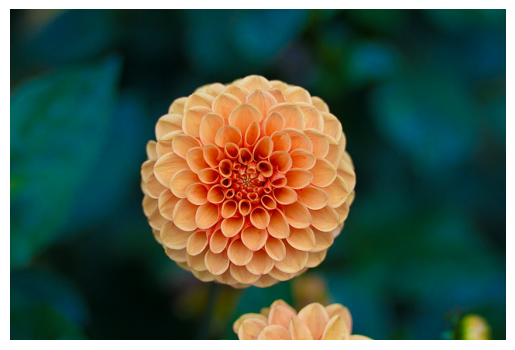

In [3]:
plt.imshow(image)
plt.axis("off")
plt.show()

In [4]:
gray_image =  (0.299*image[...,0] + 0.587*image[...,1] + 0.114*image[...,2]).astype(np.float32)  # 彩色图片并转为灰度
gray_image.shape

(427, 640)

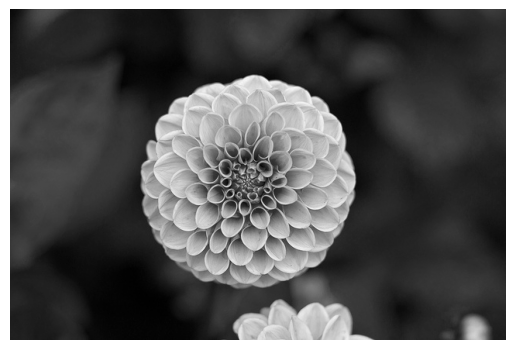

In [5]:
plt.imshow(gray_image,cmap="gray")
plt.axis("off")
plt.show()

In [6]:
# 构建一个3*3的卷积窗口（滤波器）

K_vertical = np.array([[ 1,  0, -1],
                       [ 1,  0, -1],
                       [ 1,  0, -1]], dtype=np.float32)

K_horizontal = np.array([[ 1,  1,  1],
                         [ 0,  0,  0],
                         [-1, -1, -1]], dtype=np.float32)


# 构建 7*7的卷积窗口
d = np.array([-3, -2, -1, 0, 1, 2, 3], dtype=np.float32)
s = np.array([ 1,  6, 15,20,15, 6, 1], dtype=np.float32)
K_vertical_fancy  = np.outer(s, d)   # 7x7 垂直边缘检测核
K_horizontal_fancy = K_vertical_fancy.T             # 7x7 水平边缘核

edge_v = correlate2d(gray_image, K_vertical_fancy, mode='valid')  # mode="valid" 不做任何填充
edge_h = convolve2d(gray_image, K_horizontal_fancy, mode='valid')

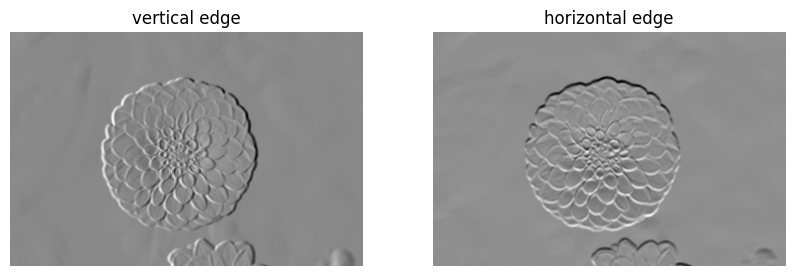

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(edge_v, cmap="gray")
plt.axis("off")
plt.title("vertical edge")

plt.subplot(122)
plt.imshow(edge_h, cmap="gray")
plt.axis("off")
plt.title("horizontal edge")

plt.show()

|上面例子可以看出，可以自己构造滤波器（filter）去对图片做卷积操作，实现对图片的特征提取（垂直边缘检测/水平边缘检测）， 在神经网络中，滤波器的参数是通过反向传播去更新优化的，除了初始化，不需要去自己指定；所以它在优化过程中会根据任务学会怎么提取图片的特征

### Padding（填充）

- 卷积中的 Padding（填充）

在卷积神经网络中，卷积操作通常会使输入图像的尺寸缩小。例如，一个 $6 \times 6$ 的图像与一个 $3 \times 3$ 卷积核做卷积，得到的输出是 $4 \times 4$。一般公式为：

$$
\text{输出大小} = n - f + 1
$$

其中 $n$ 是输入大小，$f$ 是卷积核大小。

- 不使用填充的问题

1. **尺寸不断缩小**：每次卷积都会减少图像的边长，深层网络中图像可能很快缩小到无法使用。
2. **边缘信息损失**：图像边缘或角落的像素在卷积中被利用的次数远少于中心区域，导致边缘特征信息被“弱化”。

- 填充的解决方案

为了解决上述问题，可以在输入的四周补上一圈像素（通常为 0），即 **padding**。

* 例如，将 $6 \times 6$ 的输入补一圈（p=1），变为 $8 \times 8$，再用 $3 \times 3$ 卷积，就能得到与原输入相同大小的 $6 \times 6$ 输出。
* 一般公式为：

$$
\text{输出大小} = n + 2p - f + 1
$$

- 两种常见的卷积方式

1. **Valid 卷积**：不做填充 ($p=0$)，输出尺寸会变小。
2. **Same 卷积**：选择合适的填充，使输出与输入保持相同大小。

   * 当卷积核大小 $f$ 为奇数时，所需填充量为：

   $$
   p = \frac{f-1}{2}
   $$

   例如，$f=3$ 时，$p=1$；$f=5$ 时，$p=2$。

- 为什么卷积核常取奇数大小

* 奇数核有自然的中心像素点，方便定义卷积的“中心”。
* 避免了左右/上下不对称填充的麻烦。
* 因此常见的卷积核有 $3 \times 3$、$5 \times 5$、$7 \times 7$ 等。

---

总结：**Padding 的作用是避免卷积后图像过快缩小，同时保留边缘信息。Valid 卷积不填充，输出更小；Same 卷积自动填充，保证输出与输入同尺寸。**




In [8]:
# p =1，  p=？
# 随堂练习：思考下padding怎么用numpy实现 自己代码尝试


some_data = np.array([[3,0,1,2,7,4],
                      [1,5,8,9,3,1],
                      [2,7,2,5,1,3],
                      [0,1,3,1,7,8],
                      [4,2,1,6,2,8],
                      [2,4,5,2,3,9]])

np.pad(some_data, (1,2))

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 1, 2, 7, 4, 0, 0],
       [0, 1, 5, 8, 9, 3, 1, 0, 0],
       [0, 2, 7, 2, 5, 1, 3, 0, 0],
       [0, 0, 1, 3, 1, 7, 8, 0, 0],
       [0, 4, 2, 1, 6, 2, 8, 0, 0],
       [0, 2, 4, 5, 2, 3, 9, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

### Stride（步幅）

- 卷积中的 Stride（步幅）

在卷积操作中，**stride**（步幅）表示卷积核每次移动的距离：

* **stride = 1**：卷积核逐像素滑动，输出尺寸较大。
* **stride > 1**：卷积核“跳着走”，每次跨过多个像素，输出尺寸明显缩小。

- 输出大小的公式

若输入是 $n \times n$，卷积核大小为 $f \times f$，填充为 $p$，步幅为 $s$，则输出大小为：

$$
\text{输出尺寸} = \left\lfloor \frac{n + 2p - f}{s} \right\rfloor + 1
$$

其中：

* $n$：输入大小
* $f$：卷积核大小
* $p$：padding（填充大小）
* $s$：stride（步幅大小）
* $\lfloor \cdot \rfloor$：向下取整（floor）

- 举例

* 输入 $7 \times 7$，卷积核 $3 \times 3$，无填充 ($p=0$)：

  * 当 $s=1$ → 输出大小：$(7 - 3)/1 + 1 = 5$，即 $5 \times 5$。
  * 当 $s=2$ → 输出大小：$\lfloor (7 - 3)/2 \rfloor + 1 = 3$，即 $3 \times 3$。

- 作用总结

1. **控制输出特征图的大小**：步幅越大，输出越小。
2. **减少计算量**：更少的位置参与卷积运算。
3. **调节特征提取粒度**：小步幅 → 细致特征；大步幅 → 粗略特征。

---

总结：
**Stride 决定卷积核每次移动的步长，公式 $\lfloor (n + 2p - f)/s \rfloor + 1$ 可以计算输出大小。步幅越大，特征图越小。**



### 在三维数组（体积）上卷积

 ![可视化在体积上卷积](./images/CNN/p5.png)

- 为什么需要体积卷积

在灰度图像中，输入通常是二维矩阵，例如 $6 \times 6$。
但在彩色图像中，数据包含 **三个通道（RGB）**，所以图像可以表示为 **$6 \times 6 \times 3$**。

* 前两个维度：高度和宽度
* 第三个维度：通道数（channels）

这类输入就不再是一个平面，而是一个 **体积（Volume）**。


- 三维卷积核（filter）

为了处理多通道图像，卷积核本身也必须是三维的。

* 例如输入是 $6 \times 6 \times 3$，卷积核可以是 **$3 \times 3 \times 3$**。
* **注意：卷积核的通道数必须与输入一致**，即这里的“3”必须相等。

一个 $3 \times 3 \times 3$ 卷积核包含 $27$ 个参数。

卷积的过程：

1. 把卷积核放在输入的一个位置上（覆盖 $3 \times 3 \times 3$ 的小立方块）。
2. 对应元素逐一相乘（27 次乘法），再相加，得到一个标量。
3. 把卷积核滑动到下一个位置，重复以上步骤。
4. 最终得到一个二维矩阵（例如 $4 \times 4$）。

结果：

$$
6 \times 6 \times 3 \;\;\;\ast\;\;\; 3 \times 3 \times 3 \;\;\;\rightarrow\;\;\; 4 \times 4 \times 1
$$



- 不同的卷积核 → 不同的特征

卷积核的参数决定了它能检测的特征。

* **只检测红色通道的边缘**：卷积核在红色通道放置边缘检测模板，其他通道全为零。
* **检测任意颜色的边缘**：卷积核在 RGB 三个通道都放置相同的边缘检测模板。

通过这种方式，不同的卷积核可以提取不同特征：垂直边缘、水平边缘、对角线纹理、颜色变化等。


- 多个卷积核（filters）

在实际的卷积层中，我们不会只用一个卷积核，而是会用 **多个卷积核** 来同时检测不同特征。

* 每个卷积核产生一个二维输出（feature map）。
* 所有输出 **按通道堆叠**，形成一个新的体积。

例如：

* 输入：$6 \times 6 \times 3$
* 使用 2 个 $3 \times 3 \times 3$ 卷积核
* 输出：$4 \times 4 \times 2$

公式：

$$
n \times n \times n_C \;\;\;\ast\;\;\; f \times f \times n_C \;\;\;\rightarrow\;\;\; (n-f+1) \times (n-f+1) \times n_C'
$$

其中：

* $n$：输入宽/高
* $n_C$：输入通道数（必须与卷积核通道一致）
* $f$：卷积核宽/高
* $n_C'$：卷积核个数（决定输出通道数）

（这里假设 stride=1，padding=0）

- 术语说明

* **Channels（通道数）**：输入或输出的第三个维度。
* **Depth（深度）**：有时文献里用来表示通道数，但容易与“网络深度”混淆，所以更推荐用“通道数”。

---

- 总结

1. 卷积不仅能在二维图像上操作，还能作用于多通道输入（体积）。
2. 卷积核必须与输入的通道数一致。
3. 每个卷积核会输出一个二维特征图，多个卷积核输出的结果会堆叠成新的体积。
4. 输出体积的通道数 = 使用的卷积核数。

**体积卷积让我们能在多通道图像上提取特征，每个卷积核生成一个特征图，多个卷积核堆叠后形成新的输出体积。**

### 单个卷积层

1. 输入与输出

* **输入体积（Input）**：

  $$
  n_H^{[l-1]} \times n_W^{[l-1]} \times n_C^{[l-1]}
  $$

  高度 × 宽度 × 通道数

* **输出体积（Output）**：

  $$
  n_H^{[l]} \times n_W^{[l]} \times n_C^{[l]}
  $$

  其中：

  * 高度与宽度由公式决定
  * 深度（通道数）等于 **卷积核个数**


2. 卷积层的关键参数

* $f^{[l]}$：filter size（卷积核大小）
* $p^{[l]}$：padding（填充）
* $s^{[l]}$：stride（步幅）
* $n_C^{[l]}$：number of filters（卷积核个数 = 输出通道数）



3. 卷积运算

* **每个卷积核** 大小为：

  $$
  f^{[l]} \times f^{[l]} \times n_C^{[l-1]}
  $$

* 卷积核在输入上滑动，计算：

  $$
  Z^{[l]} = W^{[l]} * A^{[l-1]} + b^{[l]}
  $$

  * $W^{[l]}$：卷积核权重
  * $A^{[l-1]}$：前一层的激活
  * $b^{[l]}$：偏置


4. 输出尺寸公式

输出的高度/宽度：

$$
n_H^{[l]} = \left\lfloor \frac{n_H^{[l-1]} + 2p^{[l]} - f^{[l]}}{s^{[l]}} \right\rfloor + 1
$$

$$
n_W^{[l]} = \left\lfloor \frac{n_W^{[l-1]} + 2p^{[l]} - f^{[l]}}{s^{[l]}} \right\rfloor + 1
$$

输出通道数：

$$
n_C^{[l]} = \text{卷积核个数}
$$



5. 参数数量

* 每个卷积核参数量：

  $$
  f^{[l]} \times f^{[l]} \times n_C^{[l-1]} + 1 \quad (\text{+1 表示偏置})
  $$
* 总参数量：

  $$
  \left(f^{[l]} \times f^{[l]} \times n_C^{[l-1]} + 1\right) \times n_C^{[l]}
  $$

**例子：**

* 输入：$6 \times 6 \times 3$
* 卷积核：$3 \times 3 \times 3$，共 10 个
* 每个卷积核：$27 + 1 = 28$
* 总参数量：$28 \times 10 = 280$



6. 测试

**题目：**
输入是 $32 \times 32 \times 3$，使用 16 个 $5 \times 5 \times 3$ 卷积核，每个核带 1 个偏置。
请计算参数总数是多少？


7. 小结

单个卷积层完成的流程：

1. 输入体积与卷积核滑动相乘并加偏置
2. 应用非线性激活函数（如 ReLU）
3. 输出新的体积，通道数 = 卷积核个数
4. 参数数量与 **卷积核大小、数量、输入通道数** 有关，与输入图像尺寸无关



In [9]:
# 批次数量：m
#  输入：m * 32*32*3

#  卷积层： 卷积核： f*f*3*卷积核的数量(n_c),  f*f*3*n_c
#  输出（不带偏置）的形状   m * （32-f+1）* （32-f+1） * n_c
#    偏置的形状 ：        1 *   1      *    1      * n_c

#  输出的形状（带上偏置）：  m * （32-f+1）* （32-f+1） * n_c

#   Flatten：           m * （（32-f+1）* （32-f+1） * n_c = 把卷积层的单个样本输出， 直接摊平成 一维度的）
#   Dense(10, activation = "softmax")


# 1. 搭一个带有卷积层的神经网络 tf.keras.layers.Conv2D()
# 输入 -> 卷积 -> 摊平 -> 全连接

# 2. 去手写数字/时尚衣服/彩图数据 试一下，能不能训练


### 内存需求

1. 训练期间卷积层需要大量内存

CNN 的一个挑战是卷积层需要大量的 RAM，在训练期间尤其如此，因为反向传播需要在前向传播过程中计算出的所有中间值。

例如，考虑一个具有 200 个 $5 \times 5$ 滤波器、步幅为 1 且采用 "same" 填充的卷积层。
如果输入是 $150 \times 100$ 的 RGB 图像（3 个通道），则参数数量为：

$$
(5 \times 5 \times 3 + 1) \times 200 = 15200
$$

（+1 表示偏置项）。与全连接层相比，它很小。

然而，200 个特征图中的每个特征图都包含 $150 \times 100$ 个神经元，
并且每个神经元都需要计算 $5 \times 5 \times 3 = 75$ 个输入的加权和：

$$
总共 = 2.25 亿次浮点运算
$$

虽然不如全连接层那么糟糕，但仍然需要进行大量的计算。

此外，如果使用 32 位浮点数来表示神经元，则单层占用的 RAM 为：

$$
200 \times 150 \times 100 \times 32 \text{ 位} = 9600 \text{ 万位} \approx 12 \text{ MB}
$$

这还只是一个实例，如果训练 100 个实例，则会占用约 **1.2 GB RAM**！


2. 推理期间与训练期间的区别

* **推理期间（即对新实例进行预测时）**：
  只需要计算完一层后，就可以释放前一层占用的 RAM，因此只需要两个连续层所需的 RAM。

* **训练期间**：
  需要保留前向传播过程中计算出的所有中间值以便进行反向传播，因此训练期间的 RAM 需求 = **所有层所需 RAM 的总量**。


3. 内存优化方法

* 如果训练因内存不足而崩溃，可以尝试：

  * 减小批量大小（batch size）
  * 使用步幅参数来降维，删除一些层
  * 使用 16 位浮点数而不是 32 位浮点数
  * 或将 CNN 分布在多个设备上



## 卷积神经网络示例

**输入：** $ 39 \times 39 \times 3 $

- 第 1 层卷积

* 卷积核大小：$f^{[1]} = 3$
* 步幅：$s^{[1]} = 1$
* 填充：$p^{[1]} = 0$
* 卷积核个数：10

**输出尺寸：** $ 37 \times 37 \times 10 $


- 第 2 层卷积

* 卷积核大小：$f^{[2]} = 5$
* 步幅：$s^{[2]} = 2$
* 填充：$p^{[2]} = 0$
* 卷积核个数：20

**输出尺寸：** $ 17 \times 17 \times 20 $

- 第 3 层卷积

* 卷积核大小：$f^{[3]} = 5$
* 步幅：$s^{[3]} = 2$
* 填充：$p^{[3]} = 0$
* 卷积核个数：40

**输出尺寸：** $ 7 \times 7 \times 40 $

- Flatten层: $ 7 \times 7 \times 40 = 1960 $

- 输出层
* 全连接层，输入维度 = 1960
* 输出维度 = 分类数 $K$
* 激活函数：

  * **逻辑回归 (logistic sigmoid)** → 二分类
  * **Softmax** → 多分类


- 总结：
这个网络结构是一个**ConvNet 示例**：输入图像 → 卷积层（3 层）→ Flatten → 全连接输出层（logistic/softmax）。

### 池化

<img alt="Max Pooling示意图" height="500" src="./images/CNN/p6.png" width="500"/>

一旦了解了卷积层如何工作，池化层就很容易掌握。它们的目标是对输入图像进行下采样（即缩小操作），以便减少计算量，内存使用量和参数数量（也能降低过拟合的风险）



在卷积神经网络（ConvNet）中，除了卷积层和全连接层，还常用 **池化层**。

它的主要作用是：

* **缩小特征图的尺寸**（降低计算量和内存消耗）
* **提高特征的鲁棒性**（让检测到的特征不依赖于具体位置）

1. Max Pooling（最大池化）

**过程：**

* 将输入划分为若干小区域（由滤波器大小 $f$ 和步幅 $s$ 决定）
* 对每个区域取最大值，作为输出

**示例 1：**
输入 $4 \times 4$，使用 $f=2, s=2$ 的 max pooling：

* 输出为 $2 \times 2$，每个位置等于对应 $2 \times 2$ 区域中的最大值

**示例 2：**
输入 $5 \times 5$，使用 $f=3, s=1$：

* 输出为 $3 \times 3$，每个输出位置是对应 $3 \times 3$ 区域的最大值

**特点：**

* 如果一个区域里有某个特征被强烈激活（值大），max pooling 会保留下来
* 直观理解：只要特征在区域内被检测到，就能传递下去


2. Average Pooling（平均池化）

* 与 max pooling 类似，但计算区域内的 **平均值**
* 现在较少使用，但在网络最后阶段，有时会用 average pooling 来压缩表示，例如从 $7 \times 7 \times 1000$ → $1 \times 1 \times 1000$


3. 高维输入的池化

* 输入可以是三维体积（例如 $H \times W \times C$）
* 池化操作对每个 **通道（channel）独立**进行
* 所以池化层不会改变通道数：

  $$
  输入: n_H \times n_W \times n_C \;\;\rightarrow\;\; 输出: n_H' \times n_W' \times n_C
  $$


4. 超参数（Hyperparameters）

* **滤波器大小 $f$**：常用 $f=2$
* **步幅 $s$**：常用 $s=2$
* **填充 $p$**：几乎总是 $p=0$
* **类型**：max pooling 或 average pooling

常见配置：

* $f=2, s=2$：将特征图长宽缩小一半
* $f=3, s=2$：缩小得更多

5. 池化层的特点

* **没有可学习的参数**：

  * 卷积层有权重和偏置需要训练
  * 池化层只有固定的超参数（$f, s, p$），无参数需要梯度下降更新
* **固定计算**：只是应用 max 或 average 运算，不会被训练过程改变



6. 总结

* **Max pooling**：取区域内最大值，常用，能保留显著特征
* **Average pooling**：取区域内平均值，较少用，但在最后阶段有时会使用
* **池化层不会改变通道数，只缩小空间尺寸**
* **没有可学习参数**，只是固定函数

**池化层就是在空间上压缩特征图，减少计算和参数量，同时保留关键信息。**

### 典型CNN架构

典型的CNN架构是先堆叠一些卷积层（通常每个卷积层都跟随一个ReLU层），接着放一个池化层，然后再堆叠另外几个卷积层(+ReLU)，再放另一个池化层，以此类推。随着图像不断经过卷积网络的各层，图像变得越来越小，但由于卷积层的存在，图像通常也越来越深（即具有更多的通道）。在顶部，添加一个常规前馈神经网络，该网络由几个全连接层(+ReLU)组成，最后一层（例如输出估计类别概率的softmax层）输出预测结果。

与其使用具有5×5核的卷积层，不如堆叠两层具有3×3核的卷积层：它使用较少的参数且需要较少的计算量，并且通常性能会更好。第一个卷积层是一个例外：它可以典型地具有较大的核（例如5×5），步幅通常为2或更大，这将减小图像的空间维度而不会丢失太多信息，由于输入图像通常只有3个通道，因此它不需要太多的计算量。

In [10]:
mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255  # expand_dims增加通道维度
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [11]:
from functools import partial

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")
model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),   # 输入图片是灰度图，只有一个颜色通道，当加载数据时，确保每个图片都是[28,28,1]
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

使用functools.partial()函数来定义DefaultConv2D，它的行为与Conv2D类似，但具有不同的默认参数：核大小为3、"same"、ReLU激活函数及相应的He初始化。

接下来，创建Sequential模型。它的第一层是DefaultConv2D，带有64个相当大的滤波器(7×7)。它使用默认步幅1，因为输入图像不是很大。它还设置input_shape=[28，28，1]，因为图像有28×28像素，具有一个颜色通道（即灰度）。当加载Fashion MNIST数据集时，请确保每个图像都具有此形状：可能需要使用np.reshape()或np.expanddims()添加通道维度。或者，可以使用Reshape层作为模型的第一层。

然后，添加一个使用默认池大小2的最大池化层，因此它将每个空间维度除以因子2。

重复相同的结构两次：两个卷积层后跟一个最大池化层。对于较大的图像，可以重复多次此结构，重复次数是可以调整的超参数。

注意，随着CNN向输出层延伸，滤波器的数量会翻倍（最初是64，然后是128，再然后是256）：这种增长是有意义的，因为低层特征的数量通常很少（例如小圆圈、水平线），但是有很多不同的方法可以将它们组合成更高层次的特征。通常的做法是在每个池化层之后将滤波器的数量加倍：由于池化层将每个空间维度除以2，因此我们能负担得起下一层特征图数量的加倍而不必担心参数数量、内存使用量或计算量的暴增。

接下来是全连接网络，由两个隐藏密集层和一个密集输出层组成。由于它是一个有10个类别的分类任务，因此输出层有10个单元，并且它使用softmax激活函数。请注意，必须在第一个密集层之前展平输入，因为它需要每个实例的一维特征数组。还添加了两个dropout层（每个层的dropout率为50%）以降低过拟合的风险。

In [13]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)

X_new = X_test[:10]  # pretend new images
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 22s 12ms/step - loss: 0.7397 - accuracy: 0.7416 - val_loss: 0.4012 - val_accuracy: 0.8618
Epoch 2/10
1719/1719 [==============================] - 20s 11ms/step - loss: 0.4165 - accuracy: 0.8613 - val_loss: 0.3035 - val_accuracy: 0.8948
Epoch 3/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.3502 - accuracy: 0.8825 - val_loss: 0.2573 - val_accuracy: 0.9052
Epoch 4/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3095 - accuracy: 0.8967 - val_loss: 0.2608 - val_accuracy: 0.9058
Epoch 5/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2854 - accuracy: 0.9041 - val_loss: 0.2633 - val_accuracy: 0.9092
Epoch 6/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2661 - accuracy: 0.9087 - val_loss: 0.2576 - val_accuracy: 0.9088
Epoch 7/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2478 - accuracy: 0.9160 - val_loss: 0.2735 -

### 为什么要CNN

1. 参数共享（Parameter Sharing）

* **直观理解**：一个边缘检测器（比如竖直边缘的 3×3 卷积核），在图像左上角和右下角都可能有用。
* **意义**：不需要在每个位置都学习独立的参数，而是让同一个卷积核在整张图像上滑动使用。
* **结果**：显著减少参数数量。例如，一个 32×32×3 的输入，如果直接全连接到下一层需要上千万参数，而卷积层可能只需要几百个。

2. 稀疏连接（Sparsity of Connections）

* 在卷积中，每个输出神经元只与输入中的局部区域（感受野）相连，而不是和所有像素都相连。
* **优点**：减少计算量，提升模型学习的效率，同时减少过拟合的风险。

3. 具备平移不变性（Translation Invariance）

* 一只猫即使向右平移几个像素，依然是“猫”。
* 由于卷积核在整张图像上共享并滑动，CNN 天然具备对小幅度平移的鲁棒性。
* 这让 CNN 更适合处理现实场景中存在的图像位置变化。

4. 更易训练，更适合图像任务

* 参数量减少 → 可以在更小的数据集上训练 → 不容易过拟合。
* 层次化结构 → 前几层学习边缘、纹理等低级特征，后几层逐渐组合成更复杂的形状和语义（如“眼睛”“猫脸”）。
* 适合搭配池化层（Pooling）与全连接层，形成完整的图像识别系统。


**总结**
CNN 的核心优势在于：

* **参数共享** → 大幅减少参数量
* **稀疏连接** → 计算和存储高效
* **平移不变性** → 识别鲁棒性更强

因此 CNN 在计算机视觉任务（图像分类、目标检测、风格迁移等）中成为主流方法。

### CNN应用--随堂练习

#### 微笑识别

In [14]:
import h5py
# from cnn_utils import *

def load_happy_dataset():
    train_dataset = h5py.File('datasets/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [15]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


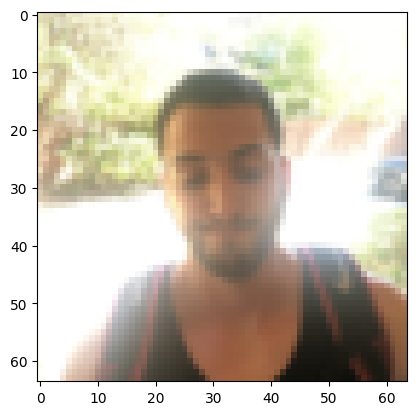

In [16]:
index = 124
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

In [17]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes.
    Normally, functions should take these values as function parameters.

    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """
    model = tf.keras.Sequential([
            # YOUR CODE STARTS HERE

            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tf.keras.layers.ZeroPadding2D((3,3), input_shape=[64, 64, 3]),
            ## Conv2D with 32 7x7 filters and stride of 1
            tf.keras.layers.Conv2D(kernel_size=7,filters=32, padding="valid",
                        activation="linear", kernel_initializer="GlorotUniform"),
            ## BatchNormalization for axis 3
            tf.keras.layers.BatchNormalization(axis=-1),
            ## ReLU
            tf.keras.layers.ReLU(),
            ## Max Pooling 2D with default parameters
            tf.keras.layers.MaxPool2D(),
            ## Flatten layer
            tf.keras.layers.Flatten(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tf.keras.layers.Dense(units=1, activation="sigmoid",)
            # YOUR CODE ENDS HERE
        ])

    return model

In [18]:
from cnn_utils import *
happy_model = happyModel()
# Print a summary for each layer
# for layer in summary(happy_model):
for layer in summary(happy_model):
    print(layer)

output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]

comparator(summary(happy_model), output)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!


In [19]:
# todo: 编译happy model， 注意这个是二元分类，损失函数
happy_model.compile(optimizer="nadam", loss="binary_crossentropy", metrics=["accuracy"])

In [20]:
happy_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                      

In [21]:
# todo：训练模型，10个轮次，批量大小16
happy_model.fit(X_train,Y_train,epochs=10,validation_data=(X_train,Y_train),batch_size=16)

Epoch 1/10
38/38 [==============================] - 1s 14ms/step - loss: 1.1839 - accuracy: 0.6750 - val_loss: 1.5722 - val_accuracy: 0.5000
Epoch 2/10
38/38 [==============================] - 0s 10ms/step - loss: 0.3508 - accuracy: 0.8917 - val_loss: 0.6350 - val_accuracy: 0.5833
Epoch 3/10
38/38 [==============================] - 0s 10ms/step - loss: 0.4028 - accuracy: 0.8933 - val_loss: 0.5664 - val_accuracy: 0.6567
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 0.1856 - accuracy: 0.9283 - val_loss: 0.2213 - val_accuracy: 0.9533
Epoch 5/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0953 - accuracy: 0.9750 - val_loss: 0.2412 - val_accuracy: 0.9250
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0665 - accuracy: 0.9717 - val_loss: 0.1375 - val_accuracy: 0.9867
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.5622 - accuracy: 0.9217 - val_loss: 3.9343 - val_accuracy: 0.5350
Epoch 8/10
38/3

In [22]:
# todo：在测试集上评估模型
happy_model.evaluate(X_test,Y_test)

5/5 [==============================] - 0s 6ms/step - loss: 0.1928 - accuracy: 0.9067


[0.19283775985240936, 0.9066666960716248]

#### 手势识别

In [23]:
def load_signs_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


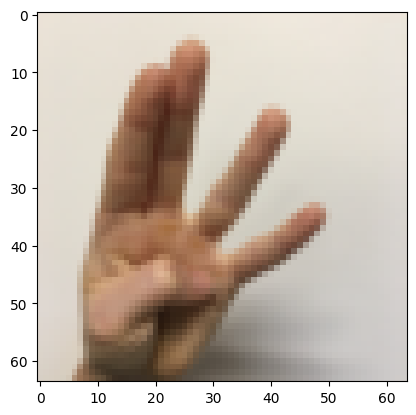

In [24]:
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [25]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [26]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes.
    Normally, functions should take these values as function parameters.

    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    # Z1 = None
    ## RELU
    # A1 = None
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    # P1 = None
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    # Z2 = None
    ## RELU
    # A2 = None
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    # P2 = None
    ## FLATTEN
    # F = None
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'"
    # outputs = None
    # YOUR CODE STARTS HERE

    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tf.keras.layers.Conv2D(filters=8, kernel_size=(4, 4),padding="same",activation="linear", kernel_initializer ="GlorotUniform",input_shape=input_shape)(input_img)
    A1=tf.keras.layers.ReLU()(Z1)
    P1=tf.keras.layers.MaxPool2D(pool_size=(8,8), strides=(8,8),padding="same")(A1)
    Z2=tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2),padding="same",activation="linear", kernel_initializer ="GlorotUniform")(P1)
    A2=tf.keras.layers.ReLU()(Z2)
    P2=tf.keras.layers.MaxPool2D(pool_size=(4, 4), strides=(4,4), padding="same")(A2)
    F=tf.keras.layers.Flatten()(P2)
    outputs=tf.keras.layers.Dense(units=6, activation="softmax")(F)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    # YOUR CODE ENDS HERE

    return model

In [27]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]

comparator(summary(conv_model), output)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_1 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_2 (ReLU)              (None, 8, 8, 16)          0         
                                                             

In [33]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,Y_train)).batch(64)  # todo: 使用tf.data.Dataset.from_tensor_slices 打包训练特征和标签，并指定批量大小64
valid_dataset = tf.data.Dataset.from_tensor_slices((X_test,Y_test)).batch(64) # todo: 使用tf.data.Dataset.from_tensor_slices 打包测试特征和标签，并指定批量大小64
history = conv_model.fit(train_dataset, epochs=100, validation_data=valid_dataset)

Epoch 1/100
17/17 [==============================] - 0s 10ms/step - loss: 0.1585 - accuracy: 0.9528 - val_loss: 0.3215 - val_accuracy: 0.8500
Epoch 2/100
17/17 [==============================] - 0s 10ms/step - loss: 0.1573 - accuracy: 0.9528 - val_loss: 0.3215 - val_accuracy: 0.8500
Epoch 3/100
17/17 [==============================] - 0s 10ms/step - loss: 0.1562 - accuracy: 0.9537 - val_loss: 0.3207 - val_accuracy: 0.8500
Epoch 4/100
17/17 [==============================] - 0s 10ms/step - loss: 0.1555 - accuracy: 0.9528 - val_loss: 0.3207 - val_accuracy: 0.8583
Epoch 5/100
17/17 [==============================] - 0s 9ms/step - loss: 0.1544 - accuracy: 0.9537 - val_loss: 0.3194 - val_accuracy: 0.8583
Epoch 6/100
17/17 [==============================] - 0s 9ms/step - loss: 0.1532 - accuracy: 0.9565 - val_loss: 0.3199 - val_accuracy: 0.8583
Epoch 7/100
17/17 [==============================] - 0s 9ms/step - loss: 0.1524 - accuracy: 0.9565 - val_loss: 0.3208 - val_accuracy: 0.8583
Epoch 8/1

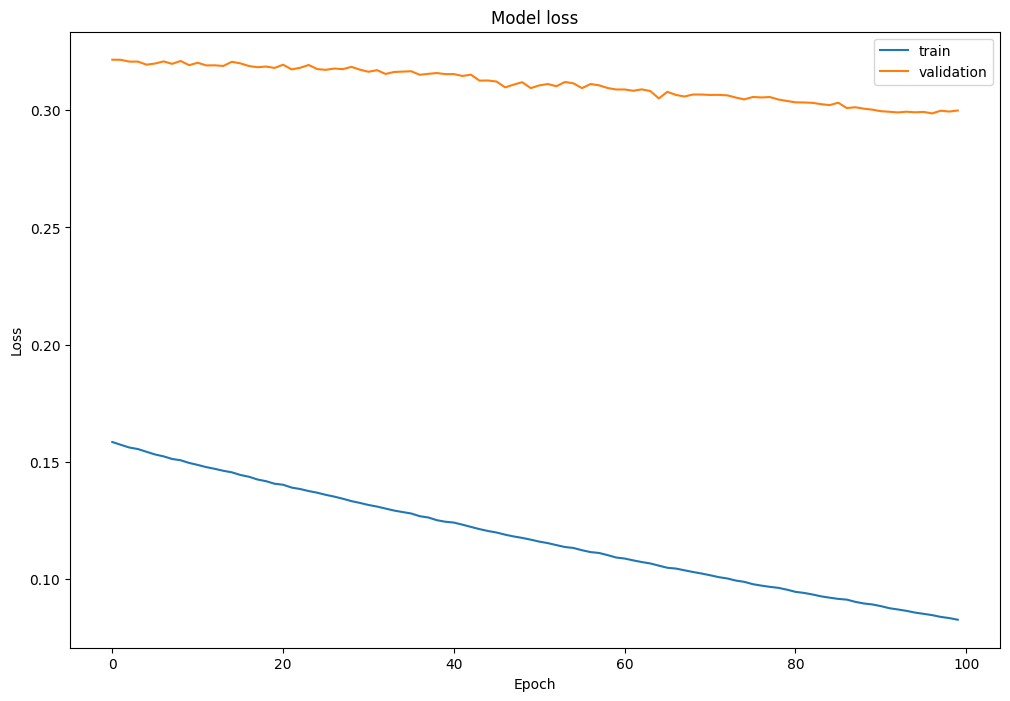

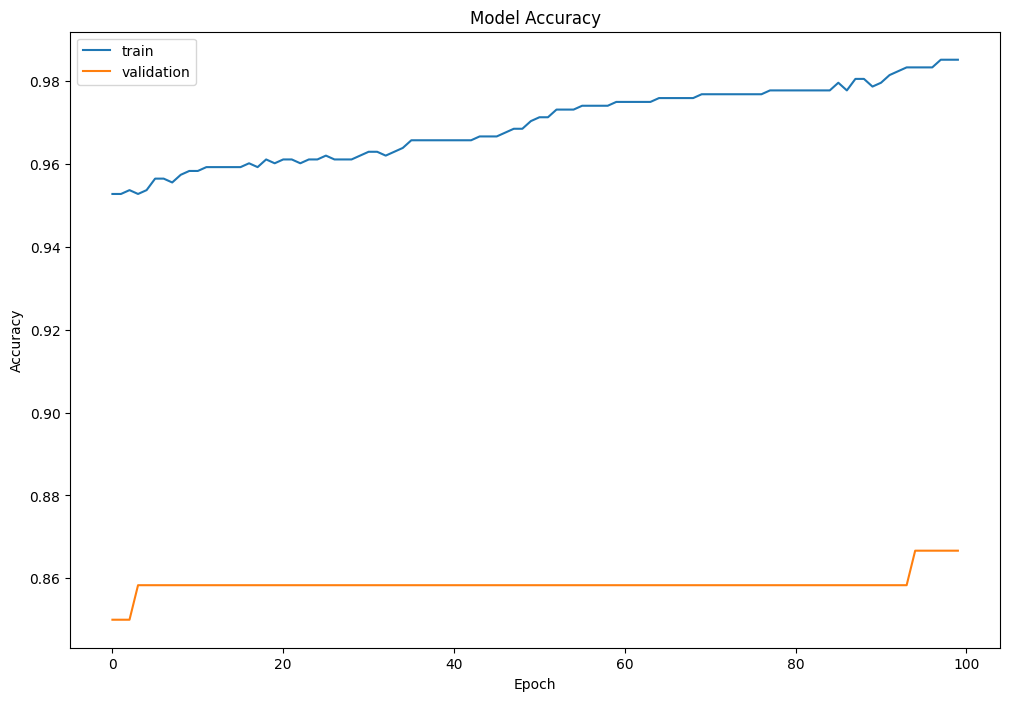

In [34]:
import pandas as pd
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']].copy()
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)

df_acc= df_loss_acc[['accuracy','val_accuracy']].copy()
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)

df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

plt.show()